In [1]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd
import networkx as nx
import json

In [2]:
data_prim = "/projects/mcbee/radja/kedro_MCBee/data/03_primary/prokka_edges.csv"
data_gff_prokka = "/projects/mcbee/radja/kedro_MCBee/data/02_intermediate/go_gff_prokka.csv"
data_networks = "/projects/mcbee/radja/kedro_MCBee/data/04_feature"
prokka_edges = pd.read_csv(data_prim)
gff_prokka = pd.read_csv(data_gff_prokka)
G = nx.from_pandas_edgelist(prokka_edges,"node1","node2",)
#["weight", "edge_length", "edge_scaf", "edge_annot"],
with open(os.path.join(data_networks,'annot_graph.json'),'r') as fs_file:
    annot_graph = nx.node_link_graph(json.load(fs_file))

NetworkXError: Invalid edge_attr argument: ['weight', 'edge_length', 'edge_scaf', 'edge_annot']

2817
726381


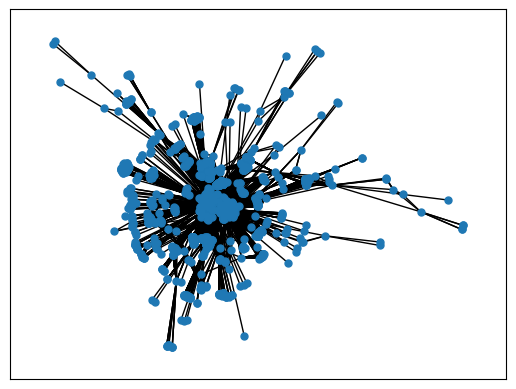

In [3]:
print(annot_graph.order())
print(annot_graph.size())
res = [
    annot_graph.subgraph(x) for x in sorted(nx.connected_components(annot_graph), key=len, reverse=True)
]
an = annot_graph.nodes()
#nx.draw_networkx(annot_graph,pos=nx.spring_layout(annot_graph))
nx.draw_networkx(res[0],with_labels = False,node_size=100,node_shape=".") #pos=nx.spectral_layout(annot_graph)
plt.show()

In [4]:
print(G.size())
print(G.order())
attrs = {k: {"apiary": v} for k, v in gff_prokka.level.items()}
nx.set_node_attributes(G, attrs)
res = [
    G.subgraph(x) for x in sorted(nx.connected_components(G), key=len, reverse=True)
]

271948
36296


In [14]:
all_edge_data = set()
for e in G.edges:
    all_edge_data.update([G.get_edge_data(*e)['edge_annot']])

In [16]:
print(len(all_edge_data))
print(len(res))
#tmp = [x for x in G.edges]
#G.get_edge_data(*tmp[0])['edge_annot']

4281
4281


In [10]:
edge_info = G.get_edge_data(*list(G.edges(res[40]))[0])
print(edge_info)
prokka_annot = set([G.get_edge_data(*x)["edge_annot"] for x in list(res[4].edges(res[4]))])
print(prokka_annot)

{'weight': -1, 'edge_length': 162.0, 'edge_scaf': nan, 'edge_annot': 'Q9RGG4'}
{'P69831'}


In [ ]:
#hierarchy_go = 
#uni_go = 
#go_uni = 

In [1]:
#roots = [n for n, d in hierarchy_go.in_degree() if d == 0]
#leafs = [n for n, d in hierarchy_go.out_degree() if d == 0]
#annot_nogo = list(set(gff_prokka.annot) - set(uni_go))
#go_list = go_uni.values()
#flat_go_list = [i for subitem in go_list for i in subitem]
#print(len(set(flat_go_list)))
#edge_combos = [list(itertools.combinations(go_uni[x], 2)) for x in leafs]
#res2 = [i for subitem in edge_combos for i in subitem]
#annot_G = nx.from_edgelist(res2)

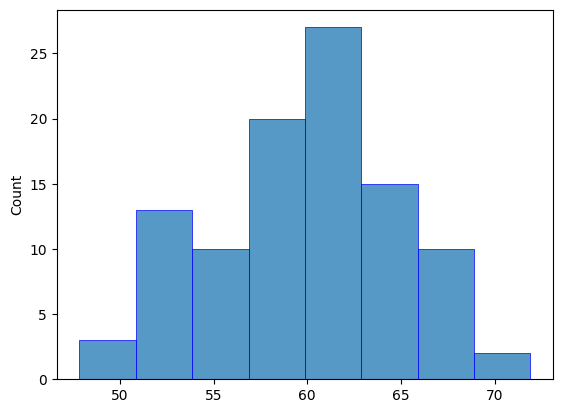

In [2]:
random.seed(1)
input_data = {"heights": np.random.normal(60,5,size=100)}
height_array = np.array(input_data['heights'])
sns.histplot(height_array,linewidth=0.5,edgecolor='blue') 
plt.show()